In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os,sys

When plotting using `ax.scatter`, the `s` parameter is different from `markersize` parameter when using `ax.plot`, the former should be `markersize**2`, detailed explanation can be found at (https://stackoverflow.com/questions/14827650/pyplot-scatter-plot-marker-size#:~:text=So%20far%20the%20answer%20to,is%20hence%201%2F72%20inches.).

But a more confusing thing is, the unit of the `s` or `markersize` is not the data unit shouwn in the axes or data, instead of, it represents the number of `points`. This notebook aims to illustrate what it is and how to specify `s` based on how many data units I want it to occupy (like, I want a dot occupy 2 data units).

In [2]:
def to_point_unit(s,fig,ax,xlim,ylim,scatter=True):
    # s means how many data units you want the marker to occupy
    ppi = 72       # matplotlib default point per inch is 72
    dpi = fig.dpi   # matplotlib default dot/pixel per inch is 100
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    fig.canvas.draw()  # or using plt.pause(0.01)
    one_data_unit_to_one_display_unit = ax.get_window_extent().width/ (xlim[1]-xlim[0])  # display unit = pixel
    one_display_unit_to_one_point_unit = ppi / dpi
    one_data_unit_to_one_point_unit = one_data_unit_to_one_display_unit * one_display_unit_to_one_point_unit
    s_point_unit = one_data_unit_to_one_point_unit * s
    if scatter:
        s_point_unit = s_point_unit ** 2
    return s_point_unit

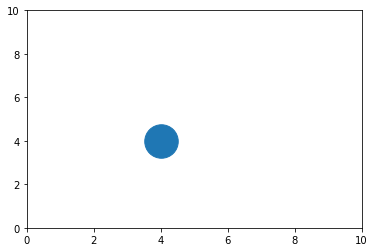

In [3]:
fig, ax = plt.subplots()
s = 1
sp = to_point_unit(s,fig,ax,(0,10),(0,10),True)
ax.scatter([4],[4],s=sp)